<img src='../img/header.jpg' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<hr>

# 02 - Practical exercise NO<sub>2</sub> - Solution - Innsbruck

## About

> In this exercise, you will put a focus on the mountain region Innsbruck. You will get deeper insights into the validation of Sentinel-5P data with Pandora station measurements under different conditions.

## Tasks

### 1. Download and visualise Pandora NO<sub>2</sub> measurements from the Innsbruck station in October 2019
  * &#128073; Download Pandora NO<sub>2</sub> measurements for the Innsbruck station
  * &#128073; Filter the data to 14-28 October 2019 and plot it as time-series

### 2. Request, download and visualise Föhn probability data from the TAWES UIBK station
  * &#128073; Request and download Föhn data from the [ACInn Station Portal](https://acinn-data.uibk.ac.at/station/1/FOEHN/)
  * &#128073; Load the data and add them to the Pandora NO<sub>2</sub> time-series plot

### 3. Conduct a Colocation of Sentinel-5P and Pandora data
  * &#128073; Follow the steps in [this notebook](./22_part2_S5P_Pandora_intercomparison.ipynb)

### 4. Add colocated Sentinel-5P data to the Pandora NO<sub>2</sub> time-series plot
  * &#128073; Load the Sentinel-5P time-series from the colocation exercise (**HINT:** data file with the name s5p_collocated.nc) and add it to the Pandora NO<sub>2</sub> time-series plot
  * &#128073; **HINT:** double-check the units of your data
  
### 5. Interpret the results &#127775;
  * Summarise your findings!
  * What can you say about the validation of Sentinel-5P data in general and during Föhn conditions?

## Module outline
* [1 - Download and visualise Pandora NO<sub>2</sub> measurements from the Innsbruck station in October 2019](#pandora)
* [2 - Request, download and visualise Föhn probability data from the TAWES UIBK station](#foehn)
* [3 - Conduct a Colocation of Sentinel-5P and Pandora data](#colocation)
* [4 - Add colocated Sentinel-5P data to the Pandora NO<sub>2</sub> time-series plot](#s5p)
* [5 - Interpret the results](#results)


<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import requests
import shutil
import cdsapi

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.axes import Axes
from matplotlib import animation
from matplotlib import colors

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='pandora'></a>1. Download and visualise Pandora NO<sub>2</sub> measurements from the Innsbruck station in October 2019



In a first step, you want to download PGN data for Innsbruck as a `.txt` file. From the [PDN web interface](https://data.pandonia-global-network.org/) you can choose the station [Innsbruck](https://data.pandonia-global-network.org/NyAlesund/), where you see that there are two instruments available, Pandora 110 and Pandora 106. Pandora 110 covers the period up to 27th of August 2022 and Pandora 106 the period after that.

For each instrument, the following data folders are available:
* `L1`: Level 1 measurements
* `L2`: Level 2 column measurements in .txt format
* `L2Fit`: Spectrally fitted data
* `L2_geoms`: Level 2 column measurements in `HDF` format

L2 column measurements are used for satellite validations. For this exercise, you want to choose the Level 2 column measurements in `txt`, specifically the following file: `Pandora1110s1_Innsbruck_L2Tot_rnvs1p1-7.txt`

With the Python package `requests`, you can download data from a given website. The code block below first establishes a HTTP connection with the PDN website and then copies the data into a `txt` file.

In [11]:
url = 'https://data.pandonia-global-network.org/Innsbruck/Pandora110s1/L2/Pandora110s1_Innsbruck_L2Tot_rnvs1p1-7.txt'
response = requests.get(url, stream=True)

with open('./Pandora110s1_Innsbruck_L2Tot_rnvs1p1-7.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The file was saved successfully')

The file was saved successfully


After downloading the file from the web interface, you can define the file path where the `txt` file is stored.

In [4]:
file_path = './Pandora110s1_Innsbruck_L2Tot_rnvs1p1-7.txt'

<br>

The next step is now to read the downloaded `txt` file as `pandas.DataFrame`. Let us start with the file of all measurements for the station Innsbruck. You can read the file with the function `read_csv` from the Python library [Pandas](https://pandas.pydata.org/). From the metadata above, you see that the first few lines contain metadata and column information we do not need in the pandas DataFrame. For this reason, we can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `sep`: specify the separator in the text file, e.g. a space
* `encoding`: specify the encoding of the file
* `skiprows`: specify how many rows to skip
* `header`: specify the index of the row that shall be set as header, e.g. `None` as this file has no header row

You see below that the resulting `DataFrame` has 463,413 rows and 37 columns.

In [5]:
df = pd.read_csv(file_path, encoding= 'unicode_escape', skiprows=66, sep=' ', header=None)
df

0           1      2      3       4       5       6   \
0         20150901T101924Z  5722.43015  19.94  40.69  158.78  113.29  305.91   
1         20150901T102105Z  5722.43132  19.84  40.58  159.40  113.51  306.27   
2         20150901T102246Z  5722.43249  19.83  40.49  160.02  113.73  306.64   
3         20150901T102426Z  5722.43365  19.97  40.39  160.64  113.94  307.01   
4         20150901T102607Z  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                    ...         ...    ...    ...     ...     ...     ...   
463408  20220727T095557.5Z  8243.41386   6.41  33.02  141.04   21.96  163.72   
463409  20220727T095603.9Z  8243.41393   6.01  33.01  141.08   21.96  163.78   
463410  20220727T101403.6Z  8243.42643  46.99  31.25  148.36   21.41  174.39   
463411  20220727T102442.0Z  8243.43382  48.62  30.37  152.96   21.34  180.81   
463412  20220727T104148.9Z  8243.44570  48.74  29.23  160.77   21.65  191.06   

             7         8      9   ...  27  28     29    30       31       32  \
0       0.57723  0.001970  1.318  ...   0   0  24.75  0.44  0.02479  0.03028   
1       0.56941  0.001948  1.316  ...   0   0  24.86  0.44  0.02476  0.03026   
2       0.59577  0.001962  1.314  ...   0   0  24.86  0.43  0.02428  0.03010   
3       0.60655  0.001963  1.312  ...   0   0  24.96  0.43  0.02467  0.03016   
4       0.62367  0.001976  1.310  ...   0   0  24.96  0.44  0.02416  0.03001   
...         ...       ...    ...  ...  ..  ..    ...   ...      ...      ...   
463408  0.26249  0.216590  1.192  ...   0   0  22.09  0.02 -0.02390 -0.01633   
463409  0.12650  0.228780  1.192  ...   0   0  22.09  0.07 -0.02436 -0.01924   
463410  0.27250  0.113460  1.169  ...   0   0  22.09  0.32 -0.01976 -0.01741   
463411  0.30146  0.353930  1.159  ...   0   0  22.19  0.38 -0.01890 -0.01733   
463412  0.23734  0.139610  1.145  ...   8   0  22.19  0.39 -0.02224 -0.01728   

            33    34  35  36  
0         13.7  1445   2   5  
1         13.8  1438   2   5  
2         13.8  1441   2   5  
3         13.8  1442   2   5  
4         13.8  1437   2   5  
...        ...   ...  ..  ..  
463408     2.5   481   2   2  
463409     2.5   481   2   2  
463410  3614.1     3   1   2  
463411   292.8    38   1   2  
463412  2320.4     5   1   2  

[463413 rows x 37 columns]

You can see that the date format for the first few rows differs from the last few rows. Thus, we need to find the row where the date format changes. The following code block prints out the time where the format changes.

In [6]:
m = pd.to_datetime(df[0], format='%Y%m%dT%H%M%SZ', errors='coerce').isna()

print (df.loc[m, 0].iloc[0])

20210215T071743.9Z


There is a change in date format at this time `20210215T071743.9Z` where milliseconds were added. You can get the row number where this time value occurs using the following code which returns the index of that row.

In [7]:
row_num = df[df[0] == '20210215T071743.9Z'].index
row_num

Index([292270], dtype='int64')

Now, you can split the DataFrame into two dataframes by row index using `iloc`, one with the old date format and the second DataFrame with the new date format.

In [8]:
df_1 = df.iloc[:292270,:]
df_2 = df.iloc[292270:,:]

Let us print out the dataframes to check that they look correct.

In [9]:
df_1

0           1      2      3       4       5       6   \
0       20150901T101924Z  5722.43015  19.94  40.69  158.78  113.29  305.91   
1       20150901T102105Z  5722.43132  19.84  40.58  159.40  113.51  306.27   
2       20150901T102246Z  5722.43249  19.83  40.49  160.02  113.73  306.64   
3       20150901T102426Z  5722.43365  19.97  40.39  160.64  113.94  307.01   
4       20150901T102607Z  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                  ...         ...    ...    ...     ...     ...     ...   
292265  20210203T145221Z  7704.61969   7.00  78.28  229.62  137.53  328.53   
292266  20210203T145228Z  7704.61977   6.21  78.29  229.64  137.54  328.56   
292267  20210203T145235Z  7704.61985   6.18  78.31  229.67  137.55  328.60   
292268  20210203T145241Z  7704.61992   6.18  78.32  229.69  137.56  328.63   
292269  20210203T151207Z  7704.63342  49.73  80.90  233.64  139.12  335.14   

             7         8      9   ...  27  28     29    30       31       32  \
0       0.57723  0.001970  1.318  ...   0   0  24.75  0.44  0.02479  0.03028   
1       0.56941  0.001948  1.316  ...   0   0  24.86  0.44  0.02476  0.03026   
2       0.59577  0.001962  1.314  ...   0   0  24.86  0.43  0.02428  0.03010   
3       0.60655  0.001963  1.312  ...   0   0  24.96  0.43  0.02467  0.03016   
4       0.62367  0.001976  1.310  ...   0   0  24.96  0.44  0.02416  0.03001   
...         ...       ...    ...  ...  ..  ..    ...   ...      ...      ...   
292265  0.22359  0.011001  4.781  ...   0   0  21.79  0.41 -0.01548 -0.00827   
292266  0.21143  0.012869  4.786  ...   0   0  21.79  0.35 -0.01532 -0.00846   
292267  0.21559  0.012266  4.792  ...   0   0  21.79  0.45 -0.01561 -0.00967   
292268  0.20407  0.011128  4.797  ...   0   0  21.79  0.37 -0.01580 -0.01022   
292269  0.24710  0.119260  6.030  ...   0   0  21.79  0.43 -0.01404 -0.01012   

            33    34  35  36  
0         13.7  1445   2   5  
1         13.8  1438   2   5  
2         13.8  1441   2   5  
3         13.8  1442   2   5  
4         13.8  1437   2   5  
...        ...   ...  ..  ..  
292265     6.7   198   2   2  
292266     6.7   198   2   2  
292267     6.7   198   2   2  
292268     6.7   198   2   2  
292269  2761.9     4   1   2  

[292270 rows x 37 columns]

In [10]:
df_2

0           1      2      3       4       5       6   \
292270  20210215T071743.9Z  7716.30396  43.24  81.74  118.77  100.42   81.31   
292271  20210215T072434.6Z  7716.30871   7.79  80.72  120.11   99.29   82.54   
292272  20210215T072442.5Z  7716.30880   7.68  80.70  120.14   99.27   82.56   
292273  20210215T072448.5Z  7716.30887   3.69  80.69  120.16   99.25   82.58   
292274  20210215T073117.6Z  7716.31337   5.72  79.74  121.44   98.18   83.74   
...                    ...         ...    ...    ...     ...     ...     ...   
463408  20220727T095557.5Z  8243.41386   6.41  33.02  141.04   21.96  163.72   
463409  20220727T095603.9Z  8243.41393   6.01  33.01  141.08   21.96  163.78   
463410  20220727T101403.6Z  8243.42643  46.99  31.25  148.36   21.41  174.39   
463411  20220727T102442.0Z  8243.43382  48.62  30.37  152.96   21.34  180.81   
463412  20220727T104148.9Z  8243.44570  48.74  29.23  160.77   21.65  191.06   

             7         8      9   ...  27  28     29    30       31       32  \
292270  0.32110  0.003410  6.569  ...   1   1  22.19  0.49 -0.00701 -0.00644   
292271  0.39620  0.001304  5.924  ...   0   0  22.19  0.49 -0.01008 -0.00673   
292272  0.39674  0.000870  5.913  ...   0   0  22.19  0.49 -0.00946 -0.00723   
292273  0.38677  0.001266  5.904  ...   1   1  22.19  0.49 -0.00950 -0.00725   
292274  0.34785  0.000683  5.407  ...   0   0  22.19  0.48 -0.00882 -0.00638   
...         ...       ...    ...  ...  ..  ..    ...   ...      ...      ...   
463408  0.26249  0.216590  1.192  ...   0   0  22.09  0.02 -0.02390 -0.01633   
463409  0.12650  0.228780  1.192  ...   0   0  22.09  0.07 -0.02436 -0.01924   
463410  0.27250  0.113460  1.169  ...   0   0  22.09  0.32 -0.01976 -0.01741   
463411  0.30146  0.353930  1.159  ...   0   0  22.19  0.38 -0.01890 -0.01733   
463412  0.23734  0.139610  1.145  ...   8   0  22.19  0.39 -0.02224 -0.01728   

            33   34  35  36  
292270   897.2   12   1   2  
292271    13.4  111   2   2  
292272    13.4  111   2   2  
292273    13.4  111   2   2  
292274     4.5  284   2   2  
...        ...  ...  ..  ..  
463408     2.5  481   2   2  
463409     2.5  481   2   2  
463410  3614.1    3   1   2  
463411   292.8   38   1   2  
463412  2320.4    5   1   2  

[171143 rows x 37 columns]

As expected both DataFrames have different date formats and `df1` has the number of rows that we expect.

Next, you can set the date time column `0` as the index for both DataFrames.

In [11]:
df_1 = df_1.set_index(0)
df_2 = df_2.set_index(0)

Let us print out the DataFrames to check that they look correct.

In [12]:
df_1

1      2      3       4       5       6        7   \
0                                                                             
20150901T101924Z  5722.43015  19.94  40.69  158.78  113.29  305.91  0.57723   
20150901T102105Z  5722.43132  19.84  40.58  159.40  113.51  306.27  0.56941   
20150901T102246Z  5722.43249  19.83  40.49  160.02  113.73  306.64  0.59577   
20150901T102426Z  5722.43365  19.97  40.39  160.64  113.94  307.01  0.60655   
20150901T102607Z  5722.43481  19.89  40.30  161.27  114.15  307.38  0.62367   
...                      ...    ...    ...     ...     ...     ...      ...   
20210203T145221Z  7704.61969   7.00  78.28  229.62  137.53  328.53  0.22359   
20210203T145228Z  7704.61977   6.21  78.29  229.64  137.54  328.56  0.21143   
20210203T145235Z  7704.61985   6.18  78.31  229.67  137.55  328.60  0.21559   
20210203T145241Z  7704.61992   6.18  78.32  229.69  137.56  328.63  0.20407   
20210203T151207Z  7704.63342  49.73  80.90  233.64  139.12  335.14  0.24710   

                        8      9    10  ...  27  28     29    30       31  \
0                                       ...                                 
20150901T101924Z  0.001970  1.318  0.0  ...   0   0  24.75  0.44  0.02479   
20150901T102105Z  0.001948  1.316  0.0  ...   0   0  24.86  0.44  0.02476   
20150901T102246Z  0.001962  1.314  0.0  ...   0   0  24.86  0.43  0.02428   
20150901T102426Z  0.001963  1.312  0.0  ...   0   0  24.96  0.43  0.02467   
20150901T102607Z  0.001976  1.310  0.0  ...   0   0  24.96  0.44  0.02416   
...                    ...    ...  ...  ...  ..  ..    ...   ...      ...   
20210203T145221Z  0.011001  4.781  0.0  ...   0   0  21.79  0.41 -0.01548   
20210203T145228Z  0.012869  4.786  0.0  ...   0   0  21.79  0.35 -0.01532   
20210203T145235Z  0.012266  4.792  0.0  ...   0   0  21.79  0.45 -0.01561   
20210203T145241Z  0.011128  4.797  0.0  ...   0   0  21.79  0.37 -0.01580   
20210203T151207Z  0.119260  6.030  0.0  ...   0   0  21.79  0.43 -0.01404   

                       32      33    34  35  36  
0                                                
20150901T101924Z  0.03028    13.7  1445   2   5  
20150901T102105Z  0.03026    13.8  1438   2   5  
20150901T102246Z  0.03010    13.8  1441   2   5  
20150901T102426Z  0.03016    13.8  1442   2   5  
20150901T102607Z  0.03001    13.8  1437   2   5  
...                   ...     ...   ...  ..  ..  
20210203T145221Z -0.00827     6.7   198   2   2  
20210203T145228Z -0.00846     6.7   198   2   2  
20210203T145235Z -0.00967     6.7   198   2   2  
20210203T145241Z -0.01022     6.7   198   2   2  
20210203T151207Z -0.01012  2761.9     4   1   2  

[292270 rows x 36 columns]

In [13]:
df_2

1      2      3       4       5       6        7   \
0                                                                               
20210215T071743.9Z  7716.30396  43.24  81.74  118.77  100.42   81.31  0.32110   
20210215T072434.6Z  7716.30871   7.79  80.72  120.11   99.29   82.54  0.39620   
20210215T072442.5Z  7716.30880   7.68  80.70  120.14   99.27   82.56  0.39674   
20210215T072448.5Z  7716.30887   3.69  80.69  120.16   99.25   82.58  0.38677   
20210215T073117.6Z  7716.31337   5.72  79.74  121.44   98.18   83.74  0.34785   
...                        ...    ...    ...     ...     ...     ...      ...   
20220727T095557.5Z  8243.41386   6.41  33.02  141.04   21.96  163.72  0.26249   
20220727T095603.9Z  8243.41393   6.01  33.01  141.08   21.96  163.78  0.12650   
20220727T101403.6Z  8243.42643  46.99  31.25  148.36   21.41  174.39  0.27250   
20220727T102442.0Z  8243.43382  48.62  30.37  152.96   21.34  180.81  0.30146   
20220727T104148.9Z  8243.44570  48.74  29.23  160.77   21.65  191.06  0.23734   

                          8      9    10  ...  27  28     29    30       31  \
0                                         ...                                 
20210215T071743.9Z  0.003410  6.569  0.0  ...   1   1  22.19  0.49 -0.00701   
20210215T072434.6Z  0.001304  5.924  0.0  ...   0   0  22.19  0.49 -0.01008   
20210215T072442.5Z  0.000870  5.913  0.0  ...   0   0  22.19  0.49 -0.00946   
20210215T072448.5Z  0.001266  5.904  0.0  ...   1   1  22.19  0.49 -0.00950   
20210215T073117.6Z  0.000683  5.407  0.0  ...   0   0  22.19  0.48 -0.00882   
...                      ...    ...  ...  ...  ..  ..    ...   ...      ...   
20220727T095557.5Z  0.216590  1.192  0.0  ...   0   0  22.09  0.02 -0.02390   
20220727T095603.9Z  0.228780  1.192  0.0  ...   0   0  22.09  0.07 -0.02436   
20220727T101403.6Z  0.113460  1.169  0.0  ...   0   0  22.09  0.32 -0.01976   
20220727T102442.0Z  0.353930  1.159  0.0  ...   0   0  22.19  0.38 -0.01890   
20220727T104148.9Z  0.139610  1.145  0.0  ...   8   0  22.19  0.39 -0.02224   

                         32      33   34  35  36  
0                                                 
20210215T071743.9Z -0.00644   897.2   12   1   2  
20210215T072434.6Z -0.00673    13.4  111   2   2  
20210215T072442.5Z -0.00723    13.4  111   2   2  
20210215T072448.5Z -0.00725    13.4  111   2   2  
20210215T073117.6Z -0.00638     4.5  284   2   2  
...                     ...     ...  ...  ..  ..  
20220727T095557.5Z -0.01633     2.5  481   2   2  
20220727T095603.9Z -0.01924     2.5  481   2   2  
20220727T101403.6Z -0.01741  3614.1    3   1   2  
20220727T102442.0Z -0.01733   292.8   38   1   2  
20220727T104148.9Z -0.01728  2320.4    5   1   2  

[171143 rows x 36 columns]

Now that the index is set correctly, you can parse the date column for each of these DataFrames using different date time formats. To do so, the next step is to create an index as `DateTimeIndex`. We convert the index entry to a `DateTimeIndex` format with the function `to_datetime()`. Please note: you have to specify the correct format of the index column.

In [14]:
df_1.index = pd.to_datetime(df_1.index, format = '%Y%m%dT%H%M%SZ')
df_1

1      2      3       4       5       6   \
0                                                                       
2015-09-01 10:19:24  5722.43015  19.94  40.69  158.78  113.29  305.91   
2015-09-01 10:21:05  5722.43132  19.84  40.58  159.40  113.51  306.27   
2015-09-01 10:22:46  5722.43249  19.83  40.49  160.02  113.73  306.64   
2015-09-01 10:24:26  5722.43365  19.97  40.39  160.64  113.94  307.01   
2015-09-01 10:26:07  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                         ...    ...    ...     ...     ...     ...   
2021-02-03 14:52:21  7704.61969   7.00  78.28  229.62  137.53  328.53   
2021-02-03 14:52:28  7704.61977   6.21  78.29  229.64  137.54  328.56   
2021-02-03 14:52:35  7704.61985   6.18  78.31  229.67  137.55  328.60   
2021-02-03 14:52:41  7704.61992   6.18  78.32  229.69  137.56  328.63   
2021-02-03 15:12:07  7704.63342  49.73  80.90  233.64  139.12  335.14   

                          7         8      9    10  ...  27  28     29    30  \
0                                                   ...                        
2015-09-01 10:19:24  0.57723  0.001970  1.318  0.0  ...   0   0  24.75  0.44   
2015-09-01 10:21:05  0.56941  0.001948  1.316  0.0  ...   0   0  24.86  0.44   
2015-09-01 10:22:46  0.59577  0.001962  1.314  0.0  ...   0   0  24.86  0.43   
2015-09-01 10:24:26  0.60655  0.001963  1.312  0.0  ...   0   0  24.96  0.43   
2015-09-01 10:26:07  0.62367  0.001976  1.310  0.0  ...   0   0  24.96  0.44   
...                      ...       ...    ...  ...  ...  ..  ..    ...   ...   
2021-02-03 14:52:21  0.22359  0.011001  4.781  0.0  ...   0   0  21.79  0.41   
2021-02-03 14:52:28  0.21143  0.012869  4.786  0.0  ...   0   0  21.79  0.35   
2021-02-03 14:52:35  0.21559  0.012266  4.792  0.0  ...   0   0  21.79  0.45   
2021-02-03 14:52:41  0.20407  0.011128  4.797  0.0  ...   0   0  21.79  0.37   
2021-02-03 15:12:07  0.24710  0.119260  6.030  0.0  ...   0   0  21.79  0.43   

                          31       32      33    34  35  36  
0                                                            
2015-09-01 10:19:24  0.02479  0.03028    13.7  1445   2   5  
2015-09-01 10:21:05  0.02476  0.03026    13.8  1438   2   5  
2015-09-01 10:22:46  0.02428  0.03010    13.8  1441   2   5  
2015-09-01 10:24:26  0.02467  0.03016    13.8  1442   2   5  
2015-09-01 10:26:07  0.02416  0.03001    13.8  1437   2   5  
...                      ...      ...     ...   ...  ..  ..  
2021-02-03 14:52:21 -0.01548 -0.00827     6.7   198   2   2  
2021-02-03 14:52:28 -0.01532 -0.00846     6.7   198   2   2  
2021-02-03 14:52:35 -0.01561 -0.00967     6.7   198   2   2  
2021-02-03 14:52:41 -0.01580 -0.01022     6.7   198   2   2  
2021-02-03 15:12:07 -0.01404 -0.01012  2761.9     4   1   2  

[292270 rows x 36 columns]

The date format of `df_2` also has milliseconds, so we need to add a `.%f` into the format.

In [15]:
df_2.index = pd.to_datetime(df_2.index, format = '%Y%m%dT%H%M%S.%fZ')
df_2

1      2      3       4       5       6   \
0                                                                           
2021-02-15 07:17:43.900  7716.30396  43.24  81.74  118.77  100.42   81.31   
2021-02-15 07:24:34.600  7716.30871   7.79  80.72  120.11   99.29   82.54   
2021-02-15 07:24:42.500  7716.30880   7.68  80.70  120.14   99.27   82.56   
2021-02-15 07:24:48.500  7716.30887   3.69  80.69  120.16   99.25   82.58   
2021-02-15 07:31:17.600  7716.31337   5.72  79.74  121.44   98.18   83.74   
...                             ...    ...    ...     ...     ...     ...   
2022-07-27 09:55:57.500  8243.41386   6.41  33.02  141.04   21.96  163.72   
2022-07-27 09:56:03.900  8243.41393   6.01  33.01  141.08   21.96  163.78   
2022-07-27 10:14:03.600  8243.42643  46.99  31.25  148.36   21.41  174.39   
2022-07-27 10:24:42.000  8243.43382  48.62  30.37  152.96   21.34  180.81   
2022-07-27 10:41:48.900  8243.44570  48.74  29.23  160.77   21.65  191.06   

                              7         8      9    10  ...  27  28     29  \
0                                                       ...                  
2021-02-15 07:17:43.900  0.32110  0.003410  6.569  0.0  ...   1   1  22.19   
2021-02-15 07:24:34.600  0.39620  0.001304  5.924  0.0  ...   0   0  22.19   
2021-02-15 07:24:42.500  0.39674  0.000870  5.913  0.0  ...   0   0  22.19   
2021-02-15 07:24:48.500  0.38677  0.001266  5.904  0.0  ...   1   1  22.19   
2021-02-15 07:31:17.600  0.34785  0.000683  5.407  0.0  ...   0   0  22.19   
...                          ...       ...    ...  ...  ...  ..  ..    ...   
2022-07-27 09:55:57.500  0.26249  0.216590  1.192  0.0  ...   0   0  22.09   
2022-07-27 09:56:03.900  0.12650  0.228780  1.192  0.0  ...   0   0  22.09   
2022-07-27 10:14:03.600  0.27250  0.113460  1.169  0.0  ...   0   0  22.09   
2022-07-27 10:24:42.000  0.30146  0.353930  1.159  0.0  ...   0   0  22.19   
2022-07-27 10:41:48.900  0.23734  0.139610  1.145  0.0  ...   8   0  22.19   

                           30       31       32      33   34  35  36  
0                                                                     
2021-02-15 07:17:43.900  0.49 -0.00701 -0.00644   897.2   12   1   2  
2021-02-15 07:24:34.600  0.49 -0.01008 -0.00673    13.4  111   2   2  
2021-02-15 07:24:42.500  0.49 -0.00946 -0.00723    13.4  111   2   2  
2021-02-15 07:24:48.500  0.49 -0.00950 -0.00725    13.4  111   2   2  
2021-02-15 07:31:17.600  0.48 -0.00882 -0.00638     4.5  284   2   2  
...                       ...      ...      ...     ...  ...  ..  ..  
2022-07-27 09:55:57.500  0.02 -0.02390 -0.01633     2.5  481   2   2  
2022-07-27 09:56:03.900  0.07 -0.02436 -0.01924     2.5  481   2   2  
2022-07-27 10:14:03.600  0.32 -0.01976 -0.01741  3614.1    3   1   2  
2022-07-27 10:24:42.000  0.38 -0.01890 -0.01733   292.8   38   1   2  
2022-07-27 10:41:48.900  0.39 -0.02224 -0.01728  2320.4    5   1   2  

[171143 rows x 36 columns]

Now as the two DataFrames have are both in a DateTimeIndex format, you can then use the `.concat` function to concatenate (join) both DataFrames together.

In [16]:
df_concat = pd.concat([df_1, df_2], axis=0)
df_concat

1      2      3       4       5       6   \
0                                                                           
2015-09-01 10:19:24.000  5722.43015  19.94  40.69  158.78  113.29  305.91   
2015-09-01 10:21:05.000  5722.43132  19.84  40.58  159.40  113.51  306.27   
2015-09-01 10:22:46.000  5722.43249  19.83  40.49  160.02  113.73  306.64   
2015-09-01 10:24:26.000  5722.43365  19.97  40.39  160.64  113.94  307.01   
2015-09-01 10:26:07.000  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                             ...    ...    ...     ...     ...     ...   
2022-07-27 09:55:57.500  8243.41386   6.41  33.02  141.04   21.96  163.72   
2022-07-27 09:56:03.900  8243.41393   6.01  33.01  141.08   21.96  163.78   
2022-07-27 10:14:03.600  8243.42643  46.99  31.25  148.36   21.41  174.39   
2022-07-27 10:24:42.000  8243.43382  48.62  30.37  152.96   21.34  180.81   
2022-07-27 10:41:48.900  8243.44570  48.74  29.23  160.77   21.65  191.06   

                              7         8      9    10  ...  27  28     29  \
0                                                       ...                  
2015-09-01 10:19:24.000  0.57723  0.001970  1.318  0.0  ...   0   0  24.75   
2015-09-01 10:21:05.000  0.56941  0.001948  1.316  0.0  ...   0   0  24.86   
2015-09-01 10:22:46.000  0.59577  0.001962  1.314  0.0  ...   0   0  24.86   
2015-09-01 10:24:26.000  0.60655  0.001963  1.312  0.0  ...   0   0  24.96   
2015-09-01 10:26:07.000  0.62367  0.001976  1.310  0.0  ...   0   0  24.96   
...                          ...       ...    ...  ...  ...  ..  ..    ...   
2022-07-27 09:55:57.500  0.26249  0.216590  1.192  0.0  ...   0   0  22.09   
2022-07-27 09:56:03.900  0.12650  0.228780  1.192  0.0  ...   0   0  22.09   
2022-07-27 10:14:03.600  0.27250  0.113460  1.169  0.0  ...   0   0  22.09   
2022-07-27 10:24:42.000  0.30146  0.353930  1.159  0.0  ...   0   0  22.19   
2022-07-27 10:41:48.900  0.23734  0.139610  1.145  0.0  ...   8   0  22.19   

                           30       31       32      33    34  35  36  
0                                                                      
2015-09-01 10:19:24.000  0.44  0.02479  0.03028    13.7  1445   2   5  
2015-09-01 10:21:05.000  0.44  0.02476  0.03026    13.8  1438   2   5  
2015-09-01 10:22:46.000  0.43  0.02428  0.03010    13.8  1441   2   5  
2015-09-01 10:24:26.000  0.43  0.02467  0.03016    13.8  1442   2   5  
2015-09-01 10:26:07.000  0.44  0.02416  0.03001    13.8  1437   2   5  
...                       ...      ...      ...     ...   ...  ..  ..  
2022-07-27 09:55:57.500  0.02 -0.02390 -0.01633     2.5   481   2   2  
2022-07-27 09:56:03.900  0.07 -0.02436 -0.01924     2.5   481   2   2  
2022-07-27 10:14:03.600  0.32 -0.01976 -0.01741  3614.1     3   1   2  
2022-07-27 10:24:42.000  0.38 -0.01890 -0.01733   292.8    38   1   2  
2022-07-27 10:41:48.900  0.39 -0.02224 -0.01728  2320.4     5   1   2  

[463413 rows x 36 columns]

The Nitrogen Dioxide column is described as `Nitrogen dioxide total vertical column amount [Dobson Units]` in the metadata. This column is referred to as column `8` in the metadata, however it is now column `7` in the DataFrame because Python starts the column count with at `0`. 

In a next step, let us drop the values of the Nitrogen dioxide column where there were no successful retrievals. The value `-9e99` indicates `retrieval not successful`.

To drop rows of a DataFrame based on a value in a specific column, you can use the `drop()` method. If you pass a boolean mask, the `drop()` method will drop the rows where the mask is True. Note that the number of rows is now lower (from 463,414 to 463,402 rows) than before as rows where there were no successful retrievals were dropped.

In [17]:
# Create a boolean mask to identify the rows to be dropped.
mask = df_concat[7] == -9e99

# Drop the rows with the mask.
no2_df = df_concat.drop(df_concat[mask].index)
no2_df

1      2      3       4       5       6   \
0                                                                           
2015-09-01 10:19:24.000  5722.43015  19.94  40.69  158.78  113.29  305.91   
2015-09-01 10:21:05.000  5722.43132  19.84  40.58  159.40  113.51  306.27   
2015-09-01 10:22:46.000  5722.43249  19.83  40.49  160.02  113.73  306.64   
2015-09-01 10:24:26.000  5722.43365  19.97  40.39  160.64  113.94  307.01   
2015-09-01 10:26:07.000  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                             ...    ...    ...     ...     ...     ...   
2022-07-27 09:55:57.500  8243.41386   6.41  33.02  141.04   21.96  163.72   
2022-07-27 09:56:03.900  8243.41393   6.01  33.01  141.08   21.96  163.78   
2022-07-27 10:14:03.600  8243.42643  46.99  31.25  148.36   21.41  174.39   
2022-07-27 10:24:42.000  8243.43382  48.62  30.37  152.96   21.34  180.81   
2022-07-27 10:41:48.900  8243.44570  48.74  29.23  160.77   21.65  191.06   

                              7         8      9    10  ...  27  28     29  \
0                                                       ...                  
2015-09-01 10:19:24.000  0.57723  0.001970  1.318  0.0  ...   0   0  24.75   
2015-09-01 10:21:05.000  0.56941  0.001948  1.316  0.0  ...   0   0  24.86   
2015-09-01 10:22:46.000  0.59577  0.001962  1.314  0.0  ...   0   0  24.86   
2015-09-01 10:24:26.000  0.60655  0.001963  1.312  0.0  ...   0   0  24.96   
2015-09-01 10:26:07.000  0.62367  0.001976  1.310  0.0  ...   0   0  24.96   
...                          ...       ...    ...  ...  ...  ..  ..    ...   
2022-07-27 09:55:57.500  0.26249  0.216590  1.192  0.0  ...   0   0  22.09   
2022-07-27 09:56:03.900  0.12650  0.228780  1.192  0.0  ...   0   0  22.09   
2022-07-27 10:14:03.600  0.27250  0.113460  1.169  0.0  ...   0   0  22.09   
2022-07-27 10:24:42.000  0.30146  0.353930  1.159  0.0  ...   0   0  22.19   
2022-07-27 10:41:48.900  0.23734  0.139610  1.145  0.0  ...   8   0  22.19   

                           30       31       32      33    34  35  36  
0                                                                      
2015-09-01 10:19:24.000  0.44  0.02479  0.03028    13.7  1445   2   5  
2015-09-01 10:21:05.000  0.44  0.02476  0.03026    13.8  1438   2   5  
2015-09-01 10:22:46.000  0.43  0.02428  0.03010    13.8  1441   2   5  
2015-09-01 10:24:26.000  0.43  0.02467  0.03016    13.8  1442   2   5  
2015-09-01 10:26:07.000  0.44  0.02416  0.03001    13.8  1437   2   5  
...                       ...      ...      ...     ...   ...  ..  ..  
2022-07-27 09:55:57.500  0.02 -0.02390 -0.01633     2.5   481   2   2  
2022-07-27 09:56:03.900  0.07 -0.02436 -0.01924     2.5   481   2   2  
2022-07-27 10:14:03.600  0.32 -0.01976 -0.01741  3614.1     3   1   2  
2022-07-27 10:24:42.000  0.38 -0.01890 -0.01733   292.8    38   1   2  
2022-07-27 10:41:48.900  0.39 -0.02224 -0.01728  2320.4     5   1   2  

[463402 rows x 36 columns]

Now, let us filter out measurements of low quality. The quality control column is the colum `11` and lists the following quality flags:

* 0 = assured high quality
* 1 = assured medium quality
* 2 = assured low quality
* 10 = not-assured high quality
* 11 = not-assured medium quality
* 12 = not-assured low quality
* 20 = unusable high quality
* 21 = unusable medium quality
* 22 = unusable low quality

We can use the `.isin` method from Pandas to filter the DataFrame by providing the quality control column number `11` and a list of the values that we want to include or keep in the filter. Let us keep the assured and non-assured high and medium quality values. You see that the number of measurements with medium and high quality dropped now to 369,350 rows.

In [18]:
# Define the filter
qc_filter =  no2_df[11].isin([0,1,10,11])

# Apply the filter
no2_df_qc =  no2_df[qc_filter]
no2_df_qc

1      2      3       4       5       6   \
0                                                                           
2015-09-01 10:19:24.000  5722.43015  19.94  40.69  158.78  113.29  305.91   
2015-09-01 10:21:05.000  5722.43132  19.84  40.58  159.40  113.51  306.27   
2015-09-01 10:22:46.000  5722.43249  19.83  40.49  160.02  113.73  306.64   
2015-09-01 10:24:26.000  5722.43365  19.97  40.39  160.64  113.94  307.01   
2015-09-01 10:26:07.000  5722.43481  19.89  40.30  161.27  114.15  307.38   
...                             ...    ...    ...     ...     ...     ...   
2022-07-27 09:11:38.100  8243.38308   5.93  38.49  125.71   25.39  140.83   
2022-07-27 09:11:57.700  8243.38331   5.93  38.45  125.81   25.35  140.98   
2022-07-27 09:12:29.800  8243.38368   6.24  38.38  125.97   25.30  141.22   
2022-07-27 09:55:03.700  8243.41324   6.64  33.12  140.70   22.01  163.20   
2022-07-27 09:55:10.600  8243.41332   6.35  33.11  140.74   22.00  163.27   

                              7         8      9    10  ...  27  28     29  \
0                                                       ...                  
2015-09-01 10:19:24.000  0.57723  0.001970  1.318  0.0  ...   0   0  24.75   
2015-09-01 10:21:05.000  0.56941  0.001948  1.316  0.0  ...   0   0  24.86   
2015-09-01 10:22:46.000  0.59577  0.001962  1.314  0.0  ...   0   0  24.86   
2015-09-01 10:24:26.000  0.60655  0.001963  1.312  0.0  ...   0   0  24.96   
2015-09-01 10:26:07.000  0.62367  0.001976  1.310  0.0  ...   0   0  24.96   
...                          ...       ...    ...  ...  ...  ..  ..    ...   
2022-07-27 09:11:38.100  0.32018  0.005017  1.277  0.0  ...   0   0  22.09   
2022-07-27 09:11:57.700  0.29009  0.009808  1.276  0.0  ...   0   0  22.09   
2022-07-27 09:12:29.800  0.27402  0.012325  1.275  0.0  ...   0   0  22.09   
2022-07-27 09:55:03.700  0.25467  0.010470  1.193  0.0  ...   0   0  22.09   
2022-07-27 09:55:10.600  0.26551  0.008563  1.193  0.0  ...   0   0  22.09   

                           30       31       32    33    34  35  36  
0                                                                    
2015-09-01 10:19:24.000  0.44  0.02479  0.03028  13.7  1445   2   5  
2015-09-01 10:21:05.000  0.44  0.02476  0.03026  13.8  1438   2   5  
2015-09-01 10:22:46.000  0.43  0.02428  0.03010  13.8  1441   2   5  
2015-09-01 10:24:26.000  0.43  0.02467  0.03016  13.8  1442   2   5  
2015-09-01 10:26:07.000  0.44  0.02416  0.03001  13.8  1437   2   5  
...                       ...      ...      ...   ...   ...  ..  ..  
2022-07-27 09:11:38.100  0.45 -0.01908 -0.01746   7.9   166   2   2  
2022-07-27 09:11:57.700  0.39 -0.01807 -0.01467   7.9   166   2   2  
2022-07-27 09:12:29.800  0.37 -0.01841 -0.01529   7.9   166   2   2  
2022-07-27 09:55:03.700  0.44 -0.01779 -0.01692   2.5   481   2   2  
2022-07-27 09:55:10.600  0.44 -0.01813 -0.01774   2.5   481   2   2  

[369350 rows x 36 columns]

Next, let us filter the DataFrame to our period of interest, which was a period of Föhn activity in Innsbruck. Föhn is a gusty, deep wind which mixes the usually heterogenous NO2 field. This mixing results in an obvious reduction of the systematic comparison error to the spatially smoothed satellite data.

To filter the DataFrame with a period of interest, you can create a boolean mask to idenfity the rows to be filtered by date, passing in the start and end dates of our period of interest. Next, we can then filter the DataFrame with the mask using the `loc` method. During this period, we have 4437 measurements.

In [19]:
# Create a boolean mask to identify the rows to be filtered by date
mask = (no2_df_qc.index >= datetime(2019, 10, 14)) & (no2_df_qc.index <= datetime(2019, 10, 28))

# Filter the dataframe with the mask.
no2_df_qc = no2_df_qc.loc[mask]
no2_df_qc

1      2      3       4      5       6        7   \
0                                                                               
2019-10-14 06:24:10  7226.26678   6.30  82.15  110.96  97.22  284.60  0.31843   
2019-10-14 06:24:17  7226.26686   6.15  82.13  110.99  97.24  284.62  0.31879   
2019-10-14 06:24:23  7226.26693   6.13  82.11  111.01  97.26  284.64  0.31680   
2019-10-14 06:24:30  7226.26701   6.19  82.09  111.03  97.27  284.66  0.31608   
2019-10-14 06:24:36  7226.26709   6.95  82.08  111.05  97.29  284.68  0.31451   
...                         ...    ...    ...     ...    ...     ...      ...   
2019-10-27 15:05:51  7239.62907  15.44  81.44  240.41  80.05  248.96  0.37632   
2019-10-27 15:06:07  7239.62925  14.83  81.47  240.47  80.09  249.01  0.37085   
2019-10-27 15:06:22  7239.62942  14.61  81.51  240.51  80.13  249.05  0.35878   
2019-10-27 15:19:22  7239.63846  49.89  83.46  243.04  82.18  251.45  0.32222   
2019-10-27 15:26:59  7239.64375  51.48  84.62  244.50  83.39  252.83  0.31939   

                           8      9    10  ...  27  28     29    30       31  \
0                                          ...                                 
2019-10-14 06:24:10  0.000612  6.870  0.0  ...   0   0  21.69  0.49 -0.00466   
2019-10-14 06:24:17  0.000622  6.856  0.0  ...   0   0  21.69  0.49 -0.00268   
2019-10-14 06:24:23  0.000605  6.844  0.0  ...   0   0  21.69  0.49 -0.00249   
2019-10-14 06:24:30  0.000592  6.830  0.0  ...   0   0  21.69  0.49 -0.00321   
2019-10-14 06:24:36  0.000592  6.817  0.0  ...   0   0  21.69  0.48 -0.00428   
...                       ...    ...  ...  ...  ..  ..    ...   ...      ...   
2019-10-27 15:05:51  0.001319  6.364  0.0  ...   0   0  21.88  0.46 -0.00349   
2019-10-27 15:06:07  0.001396  6.390  0.0  ...   0   0  21.88  0.45 -0.00449   
2019-10-27 15:06:22  0.001801  6.414  0.0  ...   0   0  21.88  0.46 -0.00463   
2019-10-27 15:19:22  0.002826  8.034  0.0  ...   0   0  21.88  0.43 -0.00575   
2019-10-27 15:26:59  0.001009  9.407  0.0  ...   0   0  21.88  0.47 -0.00426   

                          32     33   34  35  36  
0                                                 
2019-10-14 06:24:10  0.00248    5.5  238   2   2  
2019-10-14 06:24:17  0.00227    5.5  238   2   2  
2019-10-14 06:24:23  0.00233    5.5  238   2   2  
2019-10-14 06:24:30  0.00220    5.5  238   2   2  
2019-10-14 06:24:36  0.00228    5.5  238   2   2  
...                      ...    ...  ...  ..  ..  
2019-10-27 15:05:51  0.00134   55.5   53   1   2  
2019-10-27 15:06:07  0.00246   55.5   53   1   2  
2019-10-27 15:06:22  0.00329   55.5   53   1   2  
2019-10-27 15:19:22  0.00219  412.2   25   1   2  
2019-10-27 15:26:59  0.00310  145.4   71   1   2  

[4437 rows x 36 columns]

Now, let us visualize the total column Nitrogen Dioxide measurements during the period 14-28 October 2019. As mentioned earlier, the Nitrogen Dioxide values are available in column 7. The data also contains uncertainty values in column 8, which is described as `Uncertainty of nitrogen dioxide total vertical column amount [Dobson Units] based on measured uncertainty`. 

We can save both these columns in a variable for plotting later.

In [20]:
no2 = no2_df_qc.loc[:,7]
no2_err = no2_df_qc.loc[:,8]

Now, you can plot the data using the `matplotlib` library with the following steps:
1) Define a figure and axis
2) Define the axis error bar with the uncertainty values
3) Add labels for the X and Y-axes
4) Format the date
5) Show the plot

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.errorbar(no2.index, no2, yerr=no2_err,ecolor='r', label='NO2', alpha=0.8, color='darkblue', marker='.', linestyle='none', markersize=4 )

plt.xlabel('\nTime UT', fontsize=16)
plt.ylabel('NO2 total vertical column amount \n [DU]\n',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.title('Total column Nitrogen Dioxide - Pandora measurements - Innsbruck station - 14-28 October 2019\n', fontsize=20)

fig.autofmt_xdate()
plt.show()

## <a id='foehn'></a> 2. Request, download and visualise Föhn probability data from the TAWES UIBK station


The first step is to read the Föhn probability data from the TAWES UIBK station. The data is retrieved and provided by the department of atmospheric and cryospheric sciences of the University Innsbruck and is available under a CC BY 4.0 license.

You can read the csv data file with Python's pandas library and the function `read_csv`.

In [22]:
df_foehn = pd.read_csv('./data.csv', encoding= 'unicode_escape', skiprows=2, sep=';', header=None)
df_foehn

0    1    2    3    4      5
0     2019-10-14 00:00:00  0.0  0.0  0.0  0.0  201.0
1     2019-10-14 00:10:00  0.0  0.0  0.0  0.0  201.0
2     2019-10-14 00:20:00  0.0  0.0  0.0  0.0  201.0
3     2019-10-14 00:30:00  0.0  0.0  0.0  0.0  201.0
4     2019-10-14 00:40:00  0.0  0.0  0.0  0.0  201.0
...                   ...  ...  ...  ...  ...    ...
2010  2019-10-27 23:10:00  0.0  0.0  0.0  0.0  201.0
2011  2019-10-27 23:20:00  0.0  0.0  0.0  0.0  201.0
2012  2019-10-27 23:30:00  0.0  0.0  0.0  0.0  201.0
2013  2019-10-27 23:40:00  0.0  0.0  0.0  0.0  201.0
2014  2019-10-27 23:50:00  0.0  0.0  0.0  0.0  201.0

[2015 rows x 6 columns]

The next step is to set the first column which contains the time information as index, with the function `set_index()`.

In [23]:
df_foehn_idx = df_foehn.set_index(0)
df_foehn_idx

1    2    3    4      5
0                                             
2019-10-14 00:00:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:10:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:20:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:30:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:40:00  0.0  0.0  0.0  0.0  201.0
...                  ...  ...  ...  ...    ...
2019-10-27 23:10:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:20:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:30:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:40:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:50:00  0.0  0.0  0.0  0.0  201.0

[2015 rows x 5 columns]

In a next step, you want to convert the index into a `DateTime` format, as this allows you to easily integrate the Föhn probability data into the Pandora NO2 time-series plot.

In [24]:
df_foehn_idx.index = pd.to_datetime(df_foehn_idx.index)
df_foehn_idx

1    2    3    4      5
0                                             
2019-10-14 00:00:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:10:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:20:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:30:00  0.0  0.0  0.0  0.0  201.0
2019-10-14 00:40:00  0.0  0.0  0.0  0.0  201.0
...                  ...  ...  ...  ...    ...
2019-10-27 23:10:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:20:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:30:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:40:00  0.0  0.0  0.0  0.0  201.0
2019-10-27 23:50:00  0.0  0.0  0.0  0.0  201.0

[2015 rows x 5 columns]

The Föhn probability data is stored in the first column of the data frame. As a final step, you now want to integrate the Föhn probability data to the time-series plot from before. You can add an additional axis with `ax2 = ax.twinx()`. With this, you can add another time-series, that shares the same x-axis, but has a different unit of measurement on the y-axis.

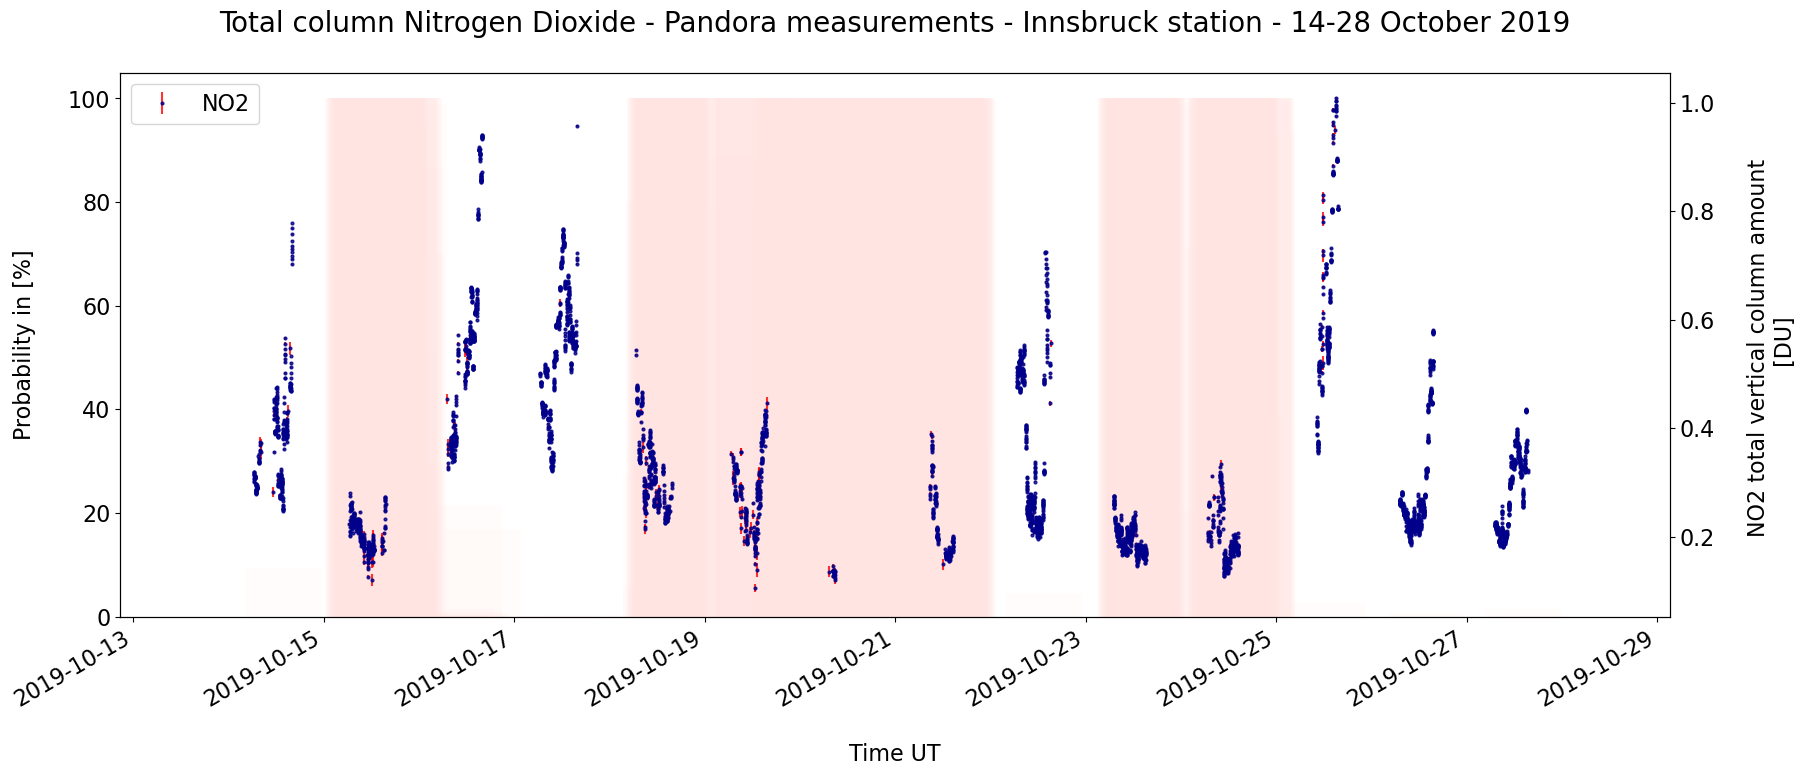

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
ax.bar(df_foehn_idx.index, df_foehn_idx.loc[:,1], color='mistyrose', alpha=0.1)

ax2.errorbar(no2.index, no2, yerr=no2_err,ecolor='r', label='NO2', alpha=0.8, color='darkblue', marker='.', linestyle='none', markersize=4 )

ax.set_xlabel('\nTime UT', fontsize=16)
ax.set_ylabel('Probability in [%]\n', fontsize=16)
ax.tick_params(labelsize=16)

ax2.set_ylabel('\nNO2 total vertical column amount \n [DU]',fontsize=16)
ax2.tick_params(labelsize=16)

plt.legend(fontsize=16, loc=2)
plt.title('Total column Nitrogen Dioxide - Pandora measurements - Innsbruck station - 14-28 October 2019\n', fontsize=20)

fig.autofmt_xdate()
plt.show()

## <a id='colocation'></a> 3. Conduct a Colocation of Sentinel-5P and Pandora data

> &#128073; Go to [22 - Part 2 - S5P intercomparison](./22_part2_S5P_Pandora_intercomparison.ipynb)

## <a id='s5p'></a> 4. Add colocated Sentinel-5P data to the Pandora NO<sub>2</sub> time-series plot

As a last step, you want now to load the output of the coloction exercise and add it to the time-series plot. The first step is to load the data file `s5p_collocated.nc` with xarray's function `open_dataset()`. 

In [26]:
s5p_col = xr.open_dataset('./s5p_collocated.nc')
s5p_col

<xarray.Dataset>
Dimensions:                                              (time: 16,
                                                          independent_4: 4,
                                                          vertical: 34,
                                                          independent_2: 2)
Dimensions without coordinates: time, independent_4, vertical, independent_2
Data variables: (12/51)
    scan_subindex                                        (time) int16 ...
    datetime_start                                       (time) datetime64[ns] ...
    datetime_length                                      (time) float64 ...
    orbit_index                                          (time) int32 ...
    validity                                             (time) int32 ...
    latitude                                             (time) float32 ...
    ...                                                   ...
    sea_ice_fraction                                     (time) float32 ...
    tropopause_pressure                                  (time) float64 ...
    collocation_index                                    (time) int32 ...
    datetime                                             (time) datetime64[ns] ...
    pressure                                             (time, vertical) float64 ...
    area                                                 (time) float64 ...
Attributes:
    Conventions:     HARP-1.0
    datetime_start:  7227.482144166666
    datetime_stop:   7239.534482337963
    history:         2023-01-06T08:05:23Z [vdafop-1.15.1] vdafop S5P_OPER_CFG...

The variable of interest is `NO2_column_number_density`. You can extract the variable and you see that we have a time-series of 16 days.

In [27]:
no2_s5p = s5p_col['NO2_column_number_density']
no2_s5p

<xarray.DataArray 'NO2_column_number_density' (time: 16)>
[16 values with dtype=float64]
Dimensions without coordinates: time
Attributes:
    description:  total vertical column of NO2
    units:        Pmolec/cm2

Together with the NO<sub>2</sub> time-series, you want to extract the `datetime` information, which is also stored as separate variable in the output data file.

In [28]:
s5p_date = s5p_col['datetime'].data

<br>

In the last step, you can add the S5P time-series information to the plot from before. You can add the time-series to the `ax2` object. You have to be careful of the define units. In order to bring both time-series information to the unit of `molec / cm2`, you have to apply the following conversion factors:
* S5P time-series in PMolec / cm2: multiply by `10e15`
* Pandora NO<sub>2</sub> in DU: multiply by `2.687*10e16`

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
ax.bar(df_foehn_idx.index, df_foehn_idx.loc[:,1], color='mistyrose', alpha=0.1)


ax2.errorbar(no2.index, no2*2.687*10e16, yerr=no2_err,ecolor='r', label='NO2', alpha=0.8, color='darkblue', marker='.', linestyle='none', markersize=4 )
ax2.plot(s5p_col['datetime'].data,no2_s5p.data*10e15, marker='o', linestyle='none', markersize=10, color='red')

ax.set_xlabel('\nTime UT', fontsize=16)
ax.set_ylabel('Probability in [%]\n', fontsize=16)
ax.tick_params(labelsize=16)

ax2.set_ylabel('\nNO2 total vertical column amount \n [molec / cm2]',fontsize=16)
ax2.tick_params(labelsize=16)

plt.legend(fontsize=16, loc=2)
plt.title('Total column Nitrogen Dioxide - Pandora measurements - Innsbruck station - 14-28 October 2019\n', fontsize=20)

fig.autofmt_xdate()
plt.show()

## <a id='results'></a> 5. Interpret the results &#127775;

* Summarise your findings!
> 

* What can you say about the validation of Sentinel-5P data in general and during Föhn conditions?
> 



<br>

<hr>

This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:left;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>

<img src='../img/footer.jpg' alt='Joint Training School Footer' align='left' width='100%'>